### Adaline

Imports

In [92]:
import numpy as np

In [93]:
class Adaline:

    """
    Parameters
    ----------
    eta: is the learning rate, can go from 0.00 to 1.00
    n_iter: is the number of iterations, the maximum number of iterations is called epochs
    random_state: is the seed for the numpy random number generator for initializing the weights
    
    Attributes
    ----------
    
    w_ : the weights vector
    b_ : the bias value
    
    
    
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    
    def fit(self, X, y):
        """
        Fit training data
        :param X: shape is (n_examples, n_features)
        :param y: shape is (n_examples), is the target values array
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float32(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            
            """
            Instead of updating the weights after each training sample, we calculate the gradient based on the whole training dataset
            """            
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ = self.eta * 2.0 * X.T.dot(errors) / X.shape[0]    
            self.b_ = self.eta * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

### Training

Loading dataset

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s, header=None, encoding=u'utf-8')

print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


Extracting only useful features

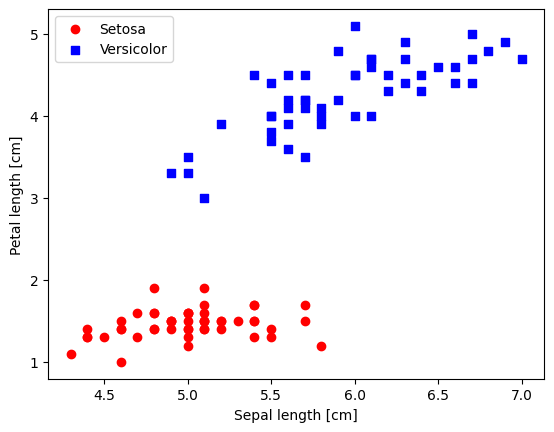

In [96]:
# Select only setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Extract sepal and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], c='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], c='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Training

2024-09-21 17:46:18.803758
2024-09-21 17:46:18.804628
total time:  0:00:00.000870


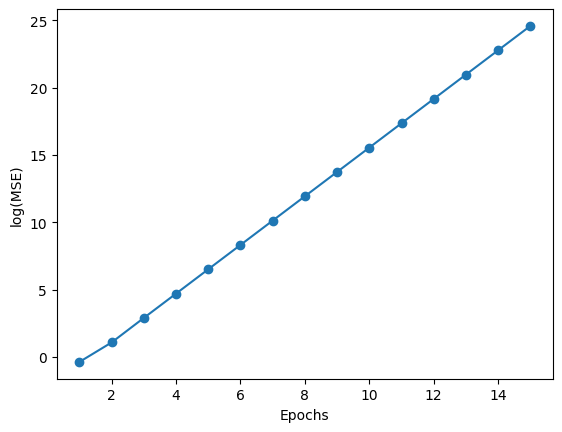

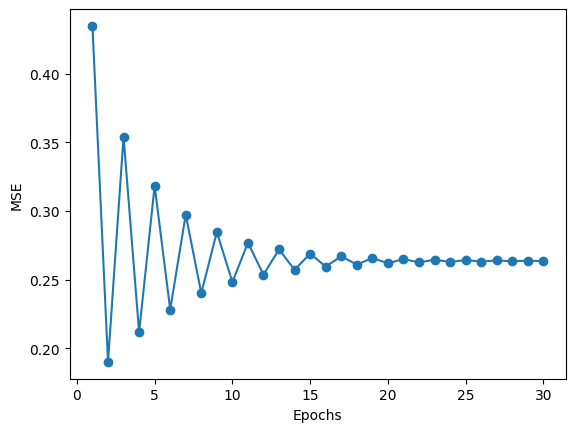

In [97]:
from datetime import datetime

ada = Adaline(eta=0.1, n_iter=15)
start = datetime.now()
print(start)
ada.fit(X, y)


end = datetime.now()
print(end)
print("total time: ", end - start)

plt.plot(range(1, len(ada.losses_) + 1), np.log10(ada.losses_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(MSE)')
plt.show()

ada2 = Adaline(eta=0.01, n_iter=30).fit(X, y)

plt.plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

